In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-modeling/Churn_Modelling.csv


In [2]:
df =  pd.read_csv('/kaggle/input/bank-customer-churn-modeling/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.drop(columns=['CustomerId','RowNumber', 'Surname'], inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [7]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df = pd.get_dummies(data=df, columns =[ 'Geography'],dtype = 'int')
df = pd.get_dummies(data=df, columns =[ 'Gender'], dtype = 'int')
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [9]:
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

myscaler = MinMaxScaler()
df[cols_to_scale] = myscaler.fit_transform(df[cols_to_scale])
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,2,0.000000,1,1,1,0.506735,1,1,0,0,1,0
1,0.516,0.310811,1,0.334031,1,0,1,0.562709,0,0,0,1,1,0
2,0.304,0.324324,8,0.636357,3,1,0,0.569654,1,1,0,0,1,0
3,0.698,0.283784,1,0.000000,2,0,0,0.469120,0,1,0,0,1,0
4,1.000,0.337838,2,0.500246,1,1,1,0.395400,0,0,0,1,1,0


In [10]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

X = df.drop(['Exited'],axis=1)
y = df['Exited']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify =y)


In [11]:
model = XGBClassifier(n_estimators =500, max_depth=4)
model.fit(X_train, y_train)
predict = model.predict(X_val)
print(predict)

[0 0 0 ... 1 0 0]


In [12]:
from sklearn.metrics import accuracy_score, classification_report
print('Accuracy score the model', accuracy_score(y_val, predict))
print('Classification Report: ', classification_report(y_val,predict))

Accuracy score the model 0.844
Classification Report:                precision    recall  f1-score   support

           0       0.88      0.93      0.90      1593
           1       0.65      0.51      0.57       407

    accuracy                           0.84      2000
   macro avg       0.76      0.72      0.74      2000
weighted avg       0.83      0.84      0.84      2000



**Using Smote**


Since there is an imbalance in the target column Exited, we try to balamce it out


In [13]:
from imblearn.over_sampling import SMOTE
my_smote = SMOTE(sampling_strategy='minority')
x_sm,y_sm = my_smote.fit_resample(X, y)

y_sm.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(x_sm, y_sm, test_size = 0.20, random_state=42, stratify=y_sm)

In [15]:
model.fit(xtrain, ytrain)
prediction_smote = model.predict(xtest)
print(prediction_smote)

[0 1 0 ... 0 0 1]


In [16]:
from sklearn.metrics import accuracy_score, classification_report
print('Accuracy score of the model', accuracy_score(ytest, prediction_smote))
print('Classification Report: ', classification_report(ytest ,prediction_smote))

Accuracy score of the model 0.8785310734463276
Classification Report:                precision    recall  f1-score   support

           0       0.85      0.91      0.88      1593
           1       0.91      0.84      0.87      1593

    accuracy                           0.88      3186
   macro avg       0.88      0.88      0.88      3186
weighted avg       0.88      0.88      0.88      3186



TRYING WITH NEURAL NETWORKS

In [17]:
X_train.shape

(8000, 13)

In [18]:
import tensorflow as tf
from tensorflow import keras

In [19]:
nn_model = keras.Sequential([
    keras.layers.Dense(13, input_shape=(13,), activation='relu'),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

nn_model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
nn_model.fit(X_train, y_train, epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7680 - loss: 0.5452
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8064 - loss: 0.4670
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8131 - loss: 0.4436
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8176 - loss: 0.4392
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8044 - loss: 0.4505
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8124 - loss: 0.4393
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8156 - loss: 0.4314
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8177 - loss: 0.4239
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8278 - loss: 0.4051
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8226 - loss: 0.4127
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8357 - loss: 0.3888
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [20]:
nn_model.fit(xtrain, ytrain, epochs=100)

Epoch 1/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7814 - loss: 0.4511
Epoch 2/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7851 - loss: 0.4490
Epoch 3/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7885 - loss: 0.4360
Epoch 4/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7841 - loss: 0.4421
Epoch 5/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7908 - loss: 0.4378
Epoch 6/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7920 - loss: 0.4340
Epoch 7/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7915 - loss: 0.4302
Epoch 8/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7872 - loss: 0.4463
Epoch 9/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7860 - loss: 0.4408
Epoch 10/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7907 - loss: 0.4316
Epoch 11/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7899 - loss: 0.4401
Epoch 12/100
399/399 ━━━━━━━━━━━━━━━━━━━━

In [21]:
nn_model.evaluate(xtest, ytest)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7878 - loss: 0.4319


[0.43060117959976196, 0.7893911004066467]

In [22]:
yp = nn_model.predict(xtest)
yp[:5]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.6136948 ],
       [0.98776656],
       [0.18667077],
       [0.09889471],
       [0.06206298]], dtype=float32)

In [23]:
y_pred =[]
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [24]:
y_pred[:10]

[1, 1, 0, 0, 0, 1, 0, 1, 1, 1]

In [25]:
ytest[:10]

809      0
10711    1
2592     0
2513     0
8405     0
5020     1
2918     1
13785    1
10244    1
2806     1
Name: Exited, dtype: int64

In [26]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1593
           1       0.78      0.80      0.79      1593

    accuracy                           0.79      3186
   macro avg       0.79      0.79      0.79      3186
weighted avg       0.79      0.79      0.79      3186



Text(95.72222222222221, 0.5, 'Truth')

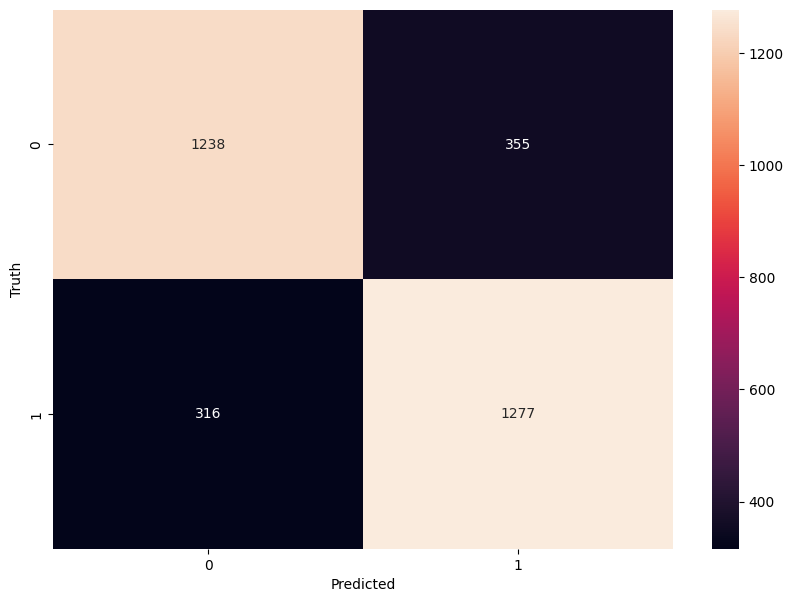

In [27]:
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sn
cm = tf.math.confusion_matrix(labels=ytest,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')